# 1. Importing libraries & reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("data/cleaned_train_data.csv")
df.head(10)

,Unnamed: 0,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
5,7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
6,10,10,Sports Central,Episode 66,106.41,Sports,84.29,Thursday,Evening,32.84,3.0,Positive,74.08016
7,11,11,Melody Mix,Episode 62,107.26,Music,78.12,Monday,Evening,78.12,1.0,Positive,103.56000
8,12,12,Game Day,Episode 76,82.14,Sports,86.65,Saturday,Morning,35.19,1.0,Neutral,48.26043
9,13,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Wednesday,Afternoon,87.87,0.0,Neutral,50.93591


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
5,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
6,10,Sports Central,Episode 66,106.41,Sports,84.29,Thursday,Evening,32.84,3.0,Positive,74.08016
7,11,Melody Mix,Episode 62,107.26,Music,78.12,Monday,Evening,78.12,1.0,Positive,103.56000
8,12,Game Day,Episode 76,82.14,Sports,86.65,Saturday,Morning,35.19,1.0,Neutral,48.26043
9,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Wednesday,Afternoon,87.87,0.0,Neutral,50.93591


# 2. Univariate Analysis

### 2.1 Categorical Features

#### 2.1.1 Most listened Podcasts by Name

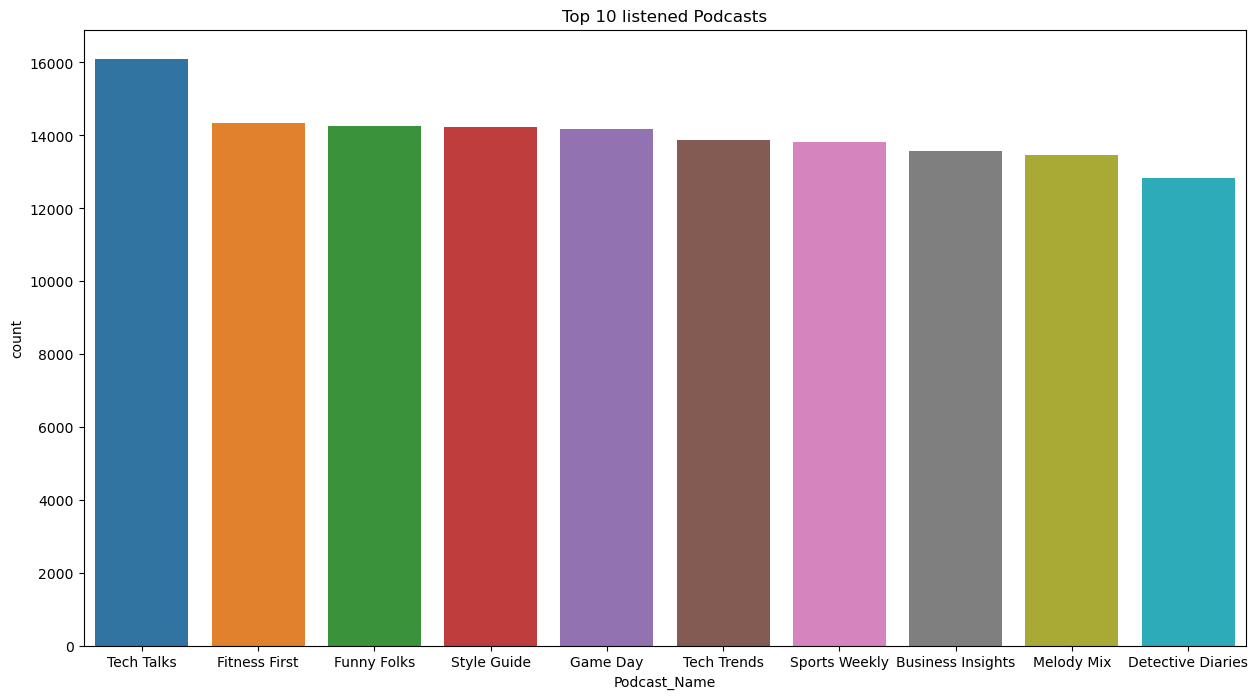

In [4]:
plt.figure(figsize=(15,8))
sorted_Podcast_names = df['Podcast_Name'].value_counts().sort_values(ascending=False).reset_index()
sb.barplot(data = sorted_Podcast_names.head(10), x= 'Podcast_Name',y='count')
plt.title("Top 10 listened Podcasts")
plt.show()

#### 2.1.2 Most Listened Podcasts by Episode Title

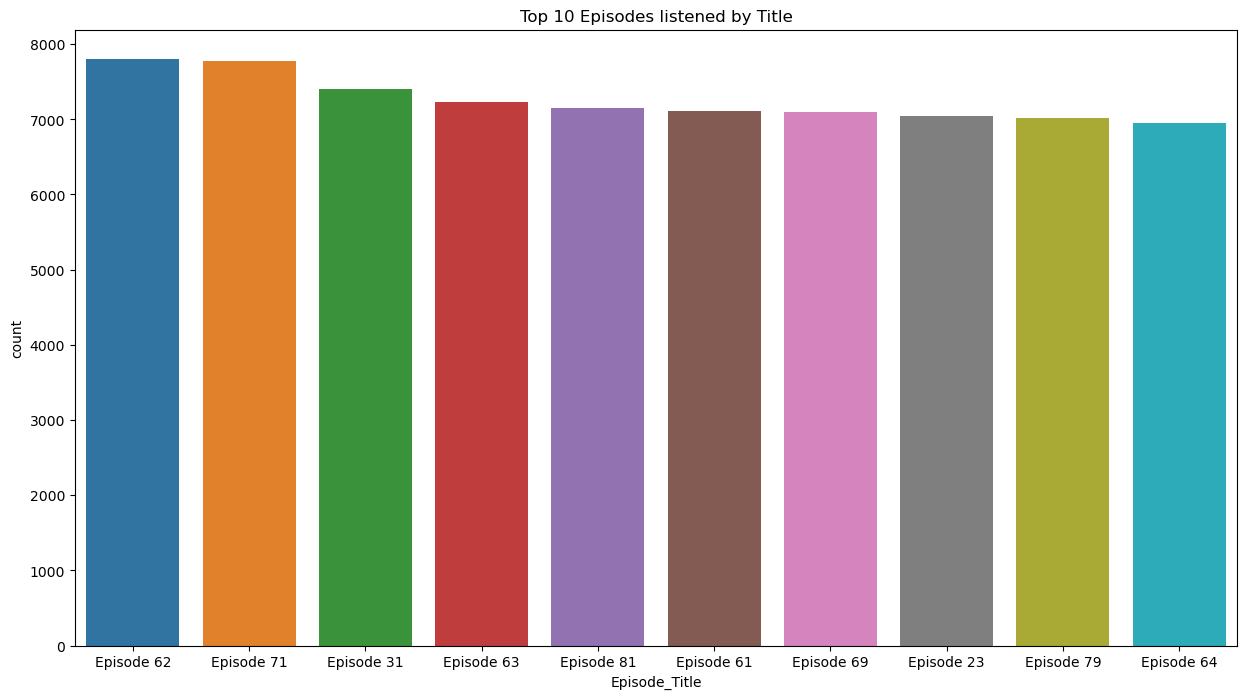

In [5]:
plt.figure(figsize=(15,8))

top_10_episode_titles = df['Episode_Title'].value_counts().sort_values(ascending=False).nlargest(10).index
sb.countplot(data = df, x = 'Episode_Title', order= top_10_episode_titles)

plt.title("Top 10 Episodes listened by Title")
plt.show()

#### 2.1.3 Top 10 most listened Genres

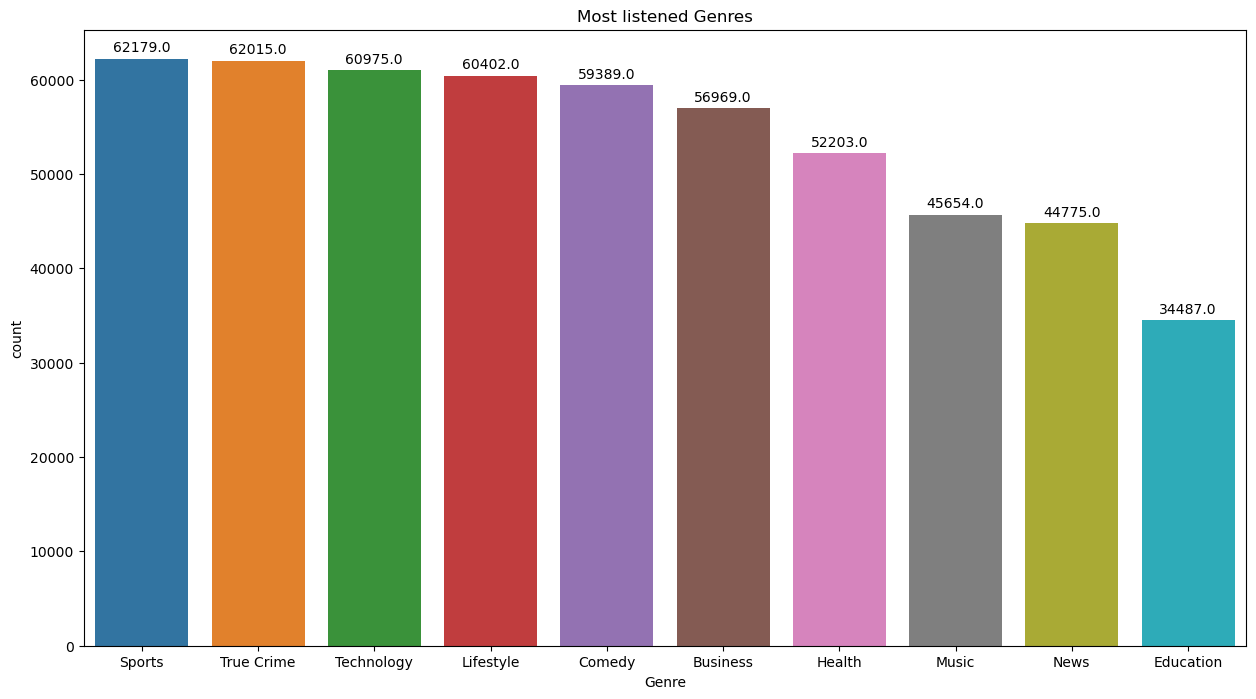

In [6]:
plt.figure(figsize=(15,8))
order = df['Genre'].value_counts().sort_values(ascending=False).index
ax= sb.countplot(data = df, x ='Genre', order = order)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)
    
plt.title('Most listened Genres')
plt.show()

#### 2.1.4 Publication Day

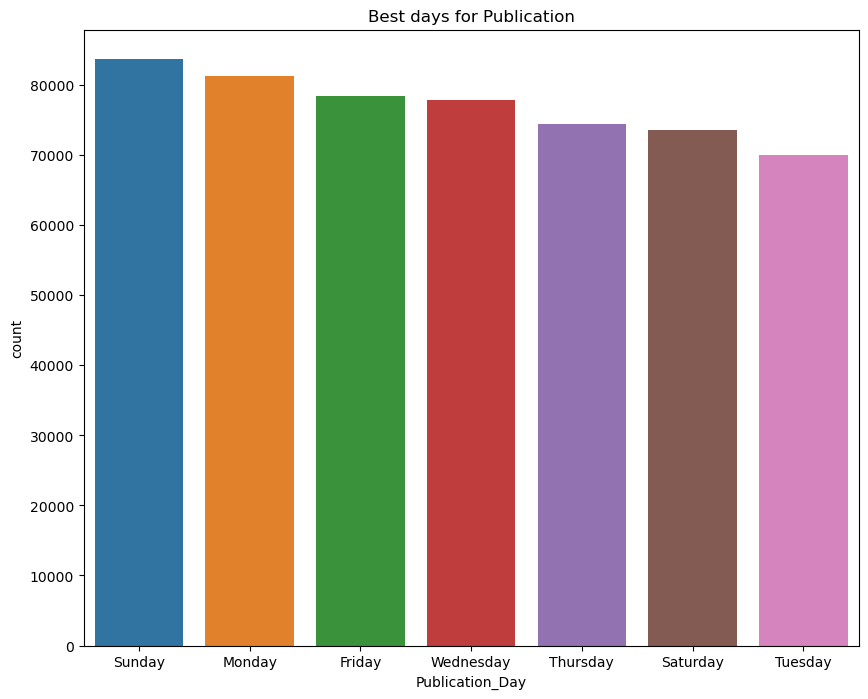

In [7]:
plt.figure(figsize=(10,8))
sorted_order = df['Publication_Day'].value_counts().sort_values(ascending=False).index
sb.countplot(data = df, x = 'Publication_Day', order = sorted_order)
plt.title("Best days for Publication")
plt.show()


#### 2.1.5 Most Common Podcast Listening Times of Day

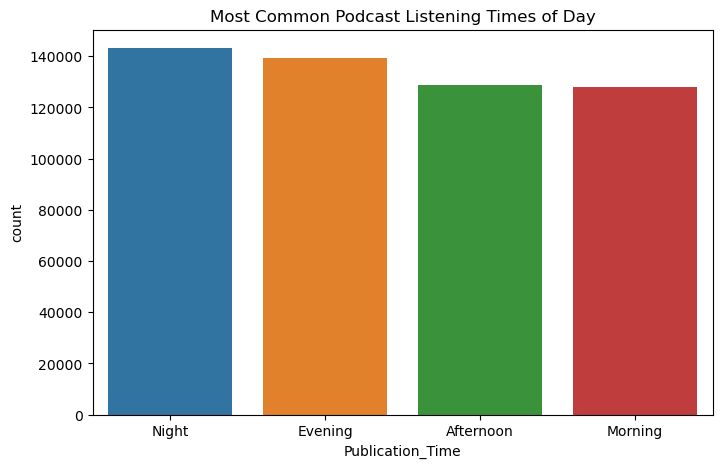

In [8]:
plt.figure(figsize=(8,5))
order = df['Publication_Time'].value_counts().sort_values(ascending=False).index
sb.countplot(data= df, x = 'Publication_Time', order=order)
plt.title("Most Common Podcast Listening Times of Day")
plt.show()

#### 2.1.6 Distribution of Sentiments across all podcasts

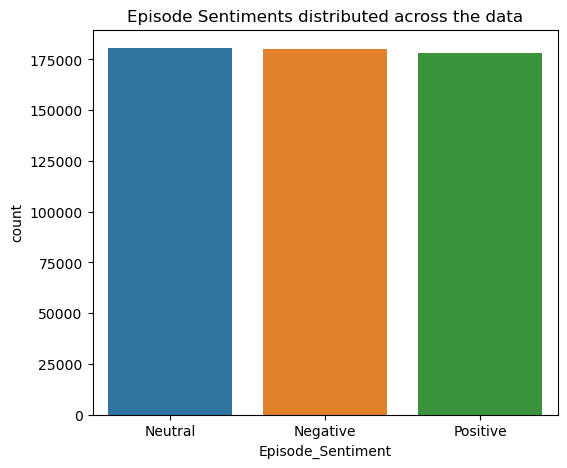

In [14]:
plt.figure(figsize=(6,5))
order = df['Episode_Sentiment'].value_counts().sort_values(ascending=False).index
sb.countplot(data= df, x = 'Episode_Sentiment', order=order)
plt.title("Episode Sentiments distributed across the data")
plt.show()

#### 2.1.7 Distribution of Ads across all podcasts

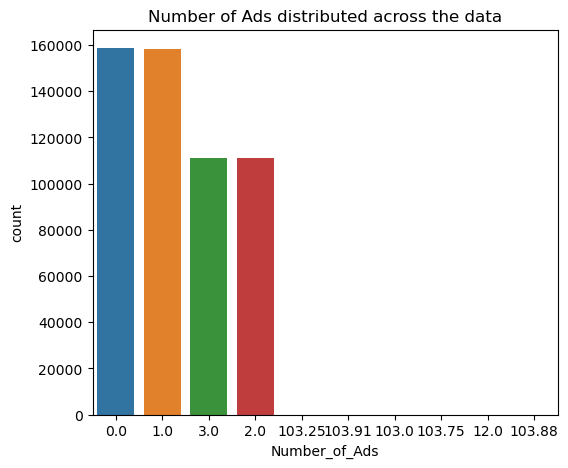

In [24]:
plt.figure(figsize=(6,5))
order = df['Number_of_Ads'].value_counts().sort_values(ascending=False).index
sb.countplot(data= df, x = 'Number_of_Ads', order=order)
plt.title("Number of Ads distributed across the data")
plt.show()

### 2.2 Numerical Features

#### 2.2.1 Distribution of Episode Length

c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


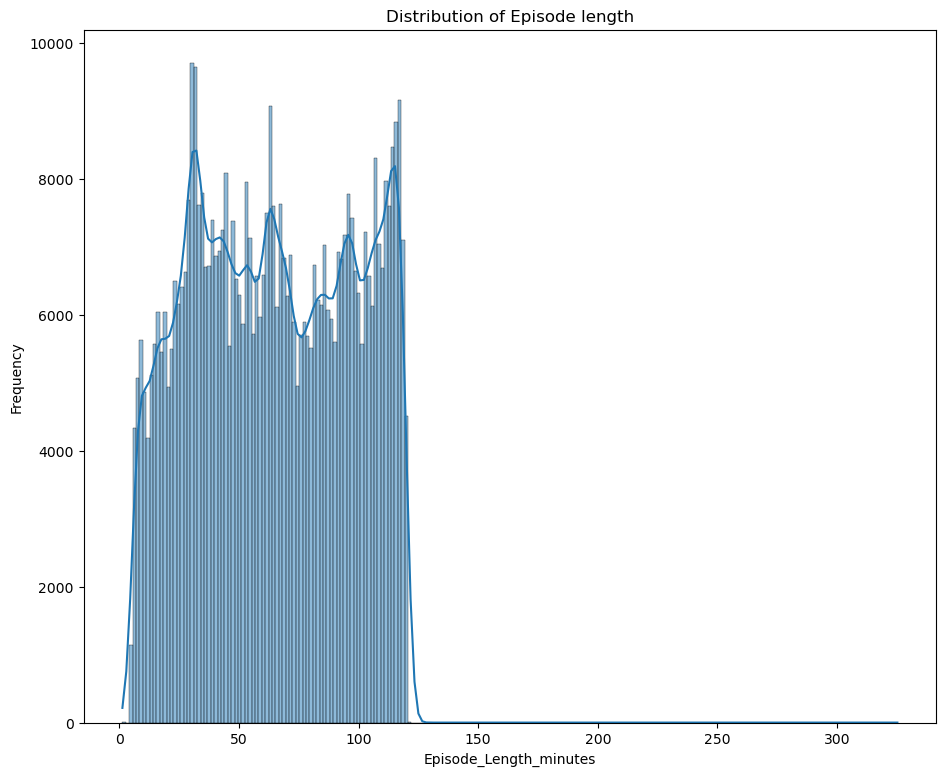

In [35]:
plt.figure(figsize =(11,9))
sb.histplot(data = df, x= 'Episode_Length_minutes',kde=True)
plt.title("Distribution of Episode length")
plt.ylabel("Frequency")
plt.show()

### 2.2.2 Distribution of Listening Time

c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


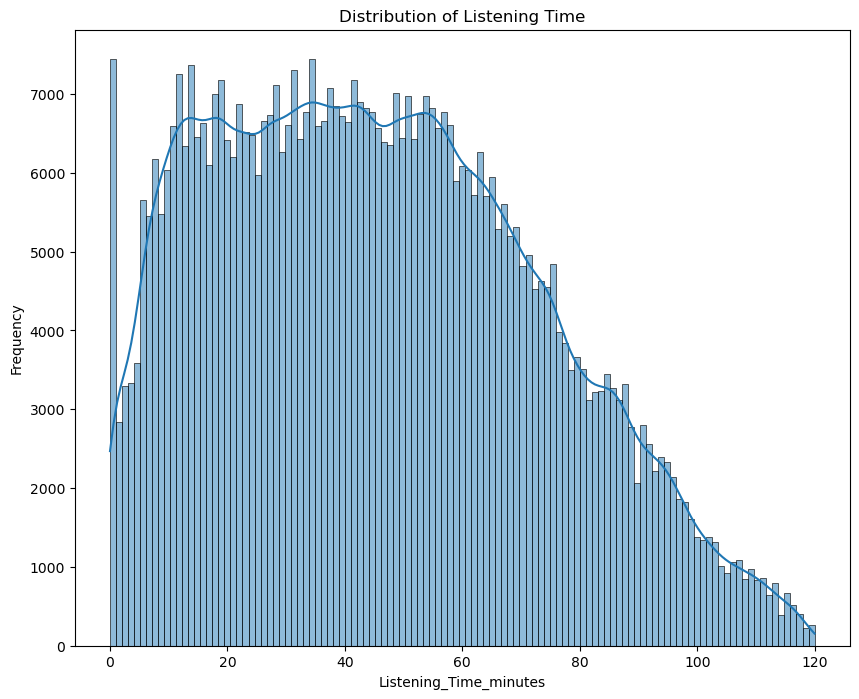

In [31]:
plt.figure(figsize =(10,8))
sb.histplot(data = df, x= 'Listening_Time_minutes',kde=True)
plt.title("Distribution of Listening Time")
plt.ylabel("Frequency")
plt.show()

### 2.2.3 Distribution of Host Popularity

c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


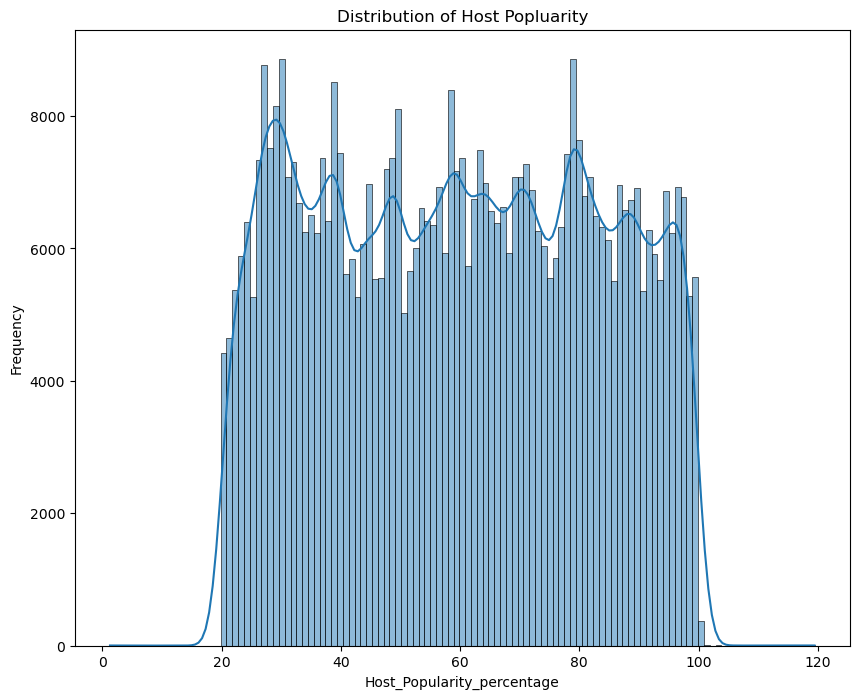

In [38]:
plt.figure(figsize=(10,8))
sb.histplot(data =df, x ='Host_Popularity_percentage',kde=True)
plt.title("Distribution of Host Popluarity")
plt.ylabel("Frequency")
plt.show()

In [9]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024


In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

#### 1. Avg. Listening Time among various Genres

In [ ]:
list_time_amng_various_genres = df.groupby('Genre')['Listening_Time_minutes'].mean()
df_list_time_amng_various_genres =  list_time_amng_various_genres.reset_index()

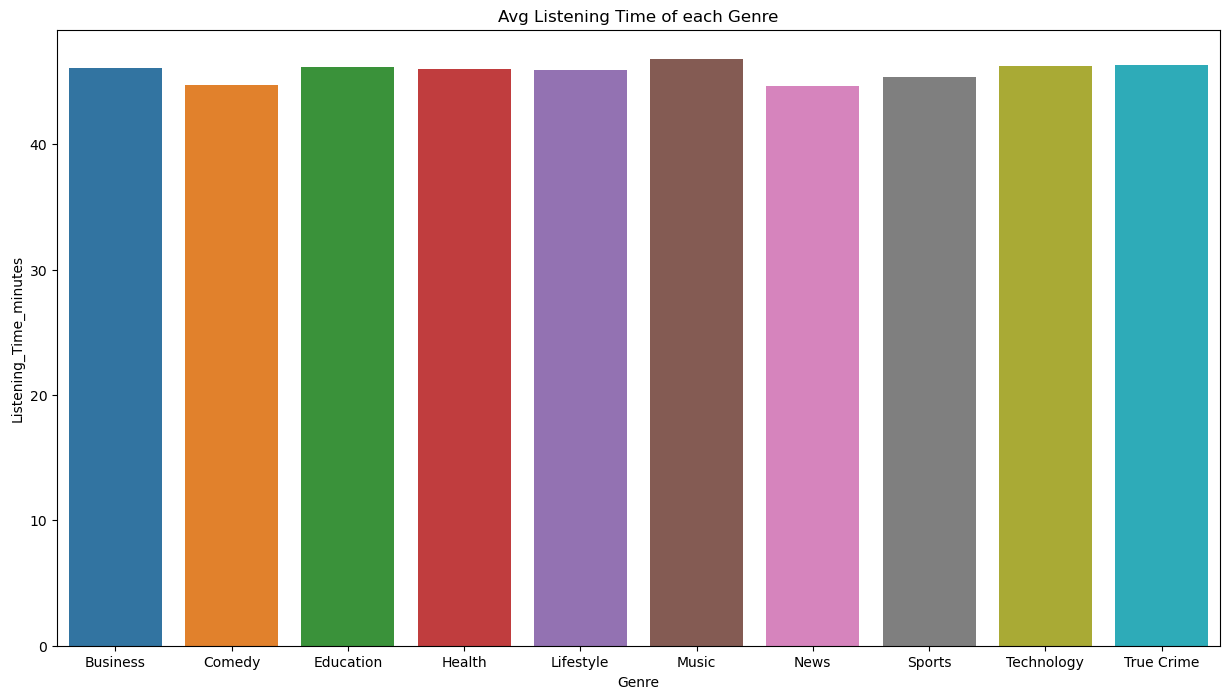

In [ ]:
plt.figure(figsize=(15,8))

sb.barplot( data = df_list_time_amng_various_genres, x='Genre', y = 'Listening_Time_minutes')

plt.title("Avg Listening Time of each Genre")
plt.show()

### 2. Avg. Listening Time on week days

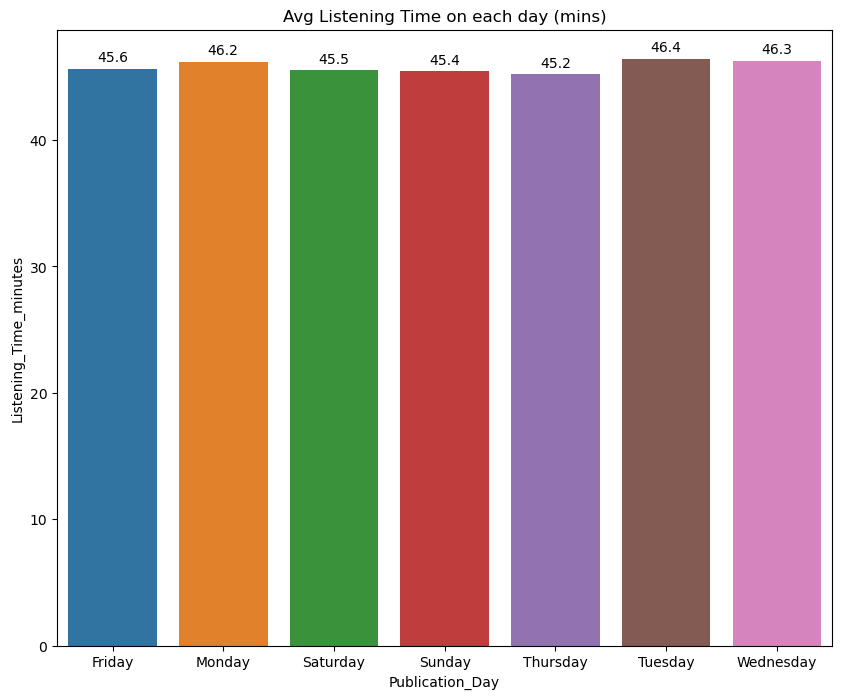

In [ ]:
list_time_on_various_days = df.groupby('Publication_Day')['Listening_Time_minutes'].mean()
df_list_time_on_various_days = list_time_on_various_days.reset_index()

plt.figure(figsize= (10,8))

#capture the barplot in a variable
ax = sb.barplot(data = df_list_time_on_various_days, x = 'Publication_Day',y = 'Listening_Time_minutes')

#let's add some labels on top of bars 

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Avg Listening Time on each day (mins)")
plt.show()

### 3. Avg. Listening Time each day with Episode Sentiments

In [ ]:
list_time_on_various_days = df.groupby(['Publication_Day','Episode_Sentiment'])['Listening_Time_minutes'].mean()
df_list_time_on_various_days = list_time_on_various_days.reset_index()

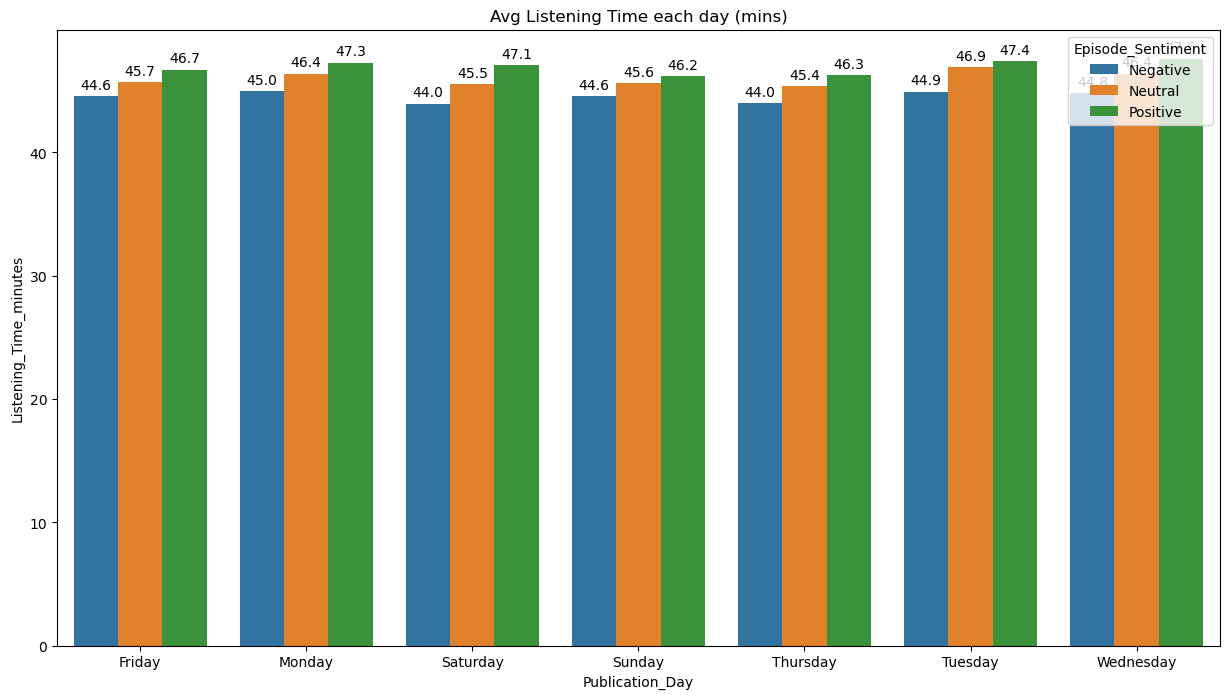

In [ ]:
plt.figure(figsize= (15,8))

#capture the barplot in a variable
ax = sb.barplot(data = df_list_time_on_various_days, x = 'Publication_Day',y = 'Listening_Time_minutes',hue ='Episode_Sentiment')

#let's add some labels on top of bars 

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Avg Listening Time each day (mins)")
plt.show()

In [ ]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

#### 4. Effect of Guest Popularity on Podcast Listening Time

<Axes: xlabel='Guest_Popularity_percentage', ylabel='Listening_Time_minutes'>

c:\Users\gurma\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\gurma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


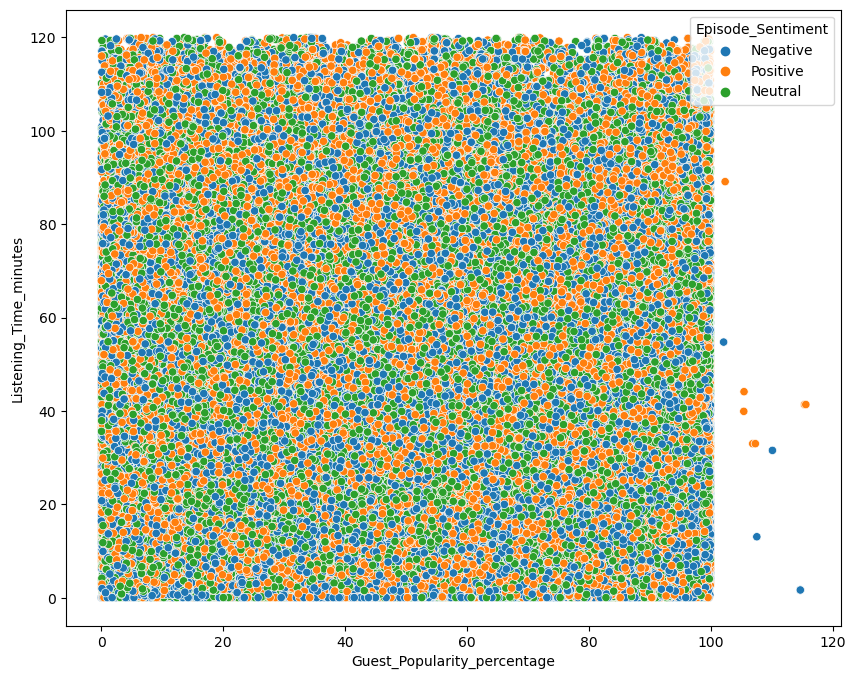

In [ ]:
plt.figure(figsize=(10,8))
sb.scatterplot(data = df, x= 'Guest_Popularity_percentage',y = 'Listening_Time_minutes', hue='Episode_Sentiment')

In [ ]:
df[['Guest_Popularity_percentage', 'Listening_Time_minutes']].corr()

,Guest_Popularity_percentage,Listening_Time_minutes
Guest_Popularity_percentage,1.000000,-0.013251
Listening_Time_minutes,-0.013251,1.000000


The confusion matrix clearly states that there is no linear relationship between Guest popularity percentage & Listening Time

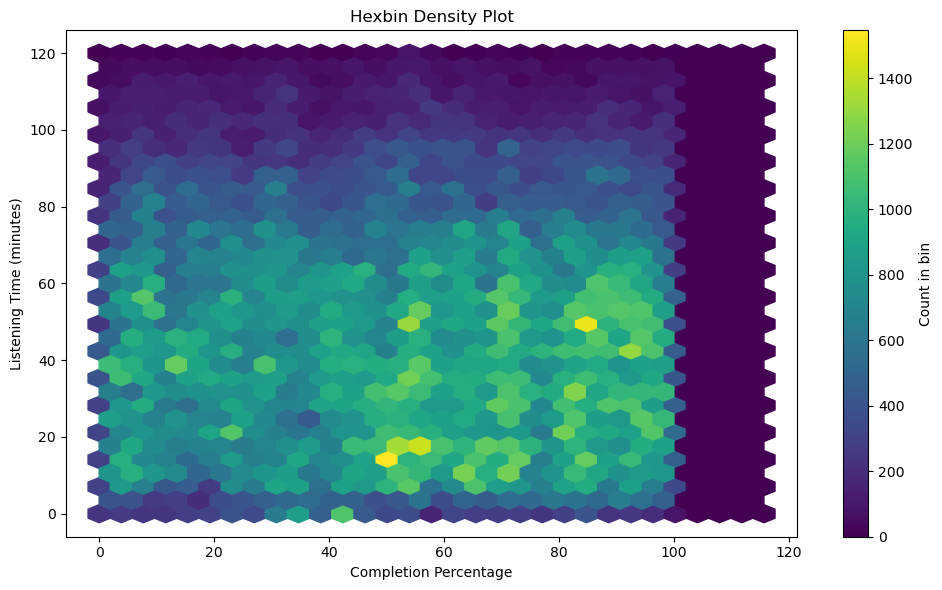

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Guest_Popularity_percentage'], df['Listening_Time_minutes'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count in bin')
plt.xlabel('Completion Percentage')
plt.ylabel('Listening Time (minutes)')
plt.title('Hexbin Density Plot')
plt.tight_layout()
plt.show()

c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Guest_Popularity_percentage', ylabel='Listening_Time_minutes'>

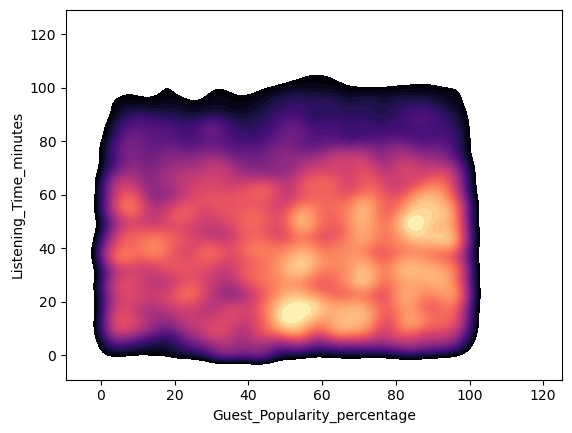

In [ ]:
sb.kdeplot(
    data=df,
    x='Guest_Popularity_percentage',
    y='Listening_Time_minutes',
    fill=True,
    cmap='magma',
    thresh=0.05,
    levels=100
)


#### 5 . Most listened Genres

In [ ]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024


{'whiskers': [<matplotlib.lines.Line2D at 0x198f0388850>,
 'caps': [<matplotlib.lines.Line2D at 0x198f0389610>,
 'boxes': [<matplotlib.lines.Line2D at 0x198f0376f50>],
 'medians': [<matplotlib.lines.Line2D at 0x198f038ad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x198f038b990>],
 'means': []}

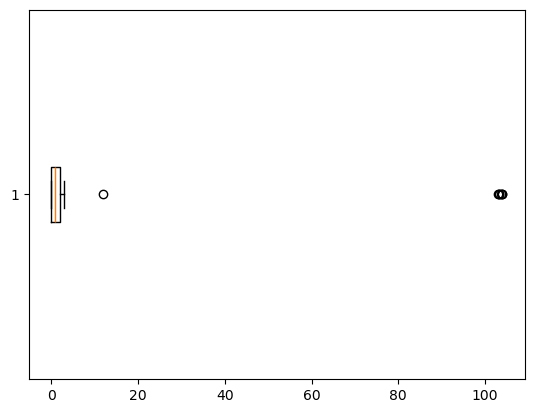

In [ ]:
plt.boxplot(df['Number_of_Ads'], vert=False)

let's plot this column to better understand it's distribution

c:\Users\gurma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Ads', ylabel='Count'>

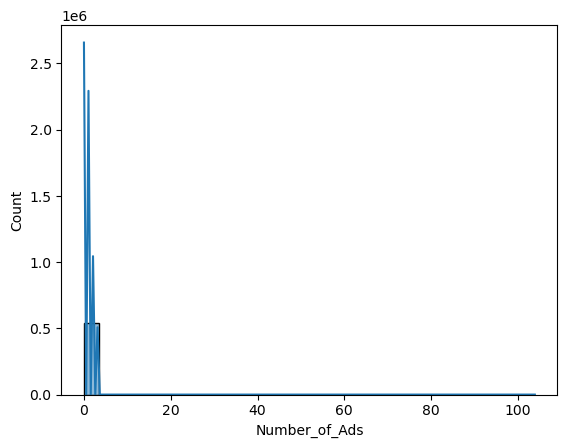

In [ ]:
sb.histplot(df['Number_of_Ads'], bins = 30,kde=True)

In [ ]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
1,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
2,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
3,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
4,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024


<Axes: xlabel='Listening_Time_minutes', ylabel='Number_of_Ads'>

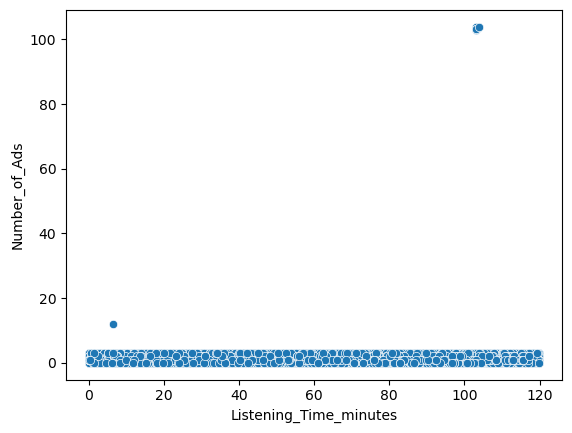

In [ ]:
sb.scatterplot(data = df, x='Listening_Time_minutes', y='Number_of_Ads')